In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Steps to solve the question

### Question 1

In [72]:
folds_number = 0
folded_thickness = 0

while folded_thickness <= 8848000:
    folds_number = folds_number + 1
    folded_thickness = pow(2, folds_number)
    
print(folds_number)

24


### Question 2

##### Steps to solve the question

V(t) = V(0)exp(-at)

a = -0.1

at half: V(t) = V(0)/2

Now: V(0)/2 = V(0)exp(-at)

1/2 = exp(-0.1t)

exp(-0.1t) = 1/2

log(e^-01t) = log(1/2)

-0.1t = log(1/2)


In [73]:
# answer
print("It will take" , np.log(1/2)/(-0.1), "time")

It will take 6.931471805599452 time


### Question 3

In [74]:
# Formula: A = P(1+(r/n))**nt
P=100
r=5/100
n=1 #Frequency is 1 since the annualized interest rate is compounded annually
# Finding the amount after year 1: Amount=pow(P(1+r/n), nt) 

for t in [1, 2, 3, 4, 5]:
    Amount= P * (1 + (r / n)) ** (n * t)
    print(round(Amount))

105
110
116
122
128


### Question 4

In [75]:
# M = Pr / 1 −(1+r)**−n

# M: is the monthly payment
# P: is the original principal amount
# r: is the interest rate per month (annual interest divided by 12)
# n: is the number of months to repay the loan

P=20000
r=0.01 # the 1% interest rate

for year in [1, 2, 3]:
    M = round((P * r) / (1 - ((1 + r)** (- (year * 12))))) #Applying the "M = Pr / 1 −(1+r)**−n" formula
    print("Year", year, ":", M)

Year 1 : 1777
Year 2 : 941
Year 3 : 664


### Question 5

In [76]:
init_invest = 100000
cust_nbr = 100
pymts = 0
acc_pymts_list = []
days_nbr = 0
days_list = []

while pymts <= init_invest:                       # iterate until the payments is greater than or equal to amount invested
    cust_nbr = cust_nbr + (cust_nbr * (1/100))    # updating customers
    days_nbr = days_nbr + 1                       # updating days
    days_list.append(days_nbr)                    # Keeping track of the number of days
    pymts = pymts + cust_nbr * 10                 # updating the payments
    acc_pymts_list.append(pymts)                  # Keeping track of accumulated profit for each day
    
print(days_nbr)

70


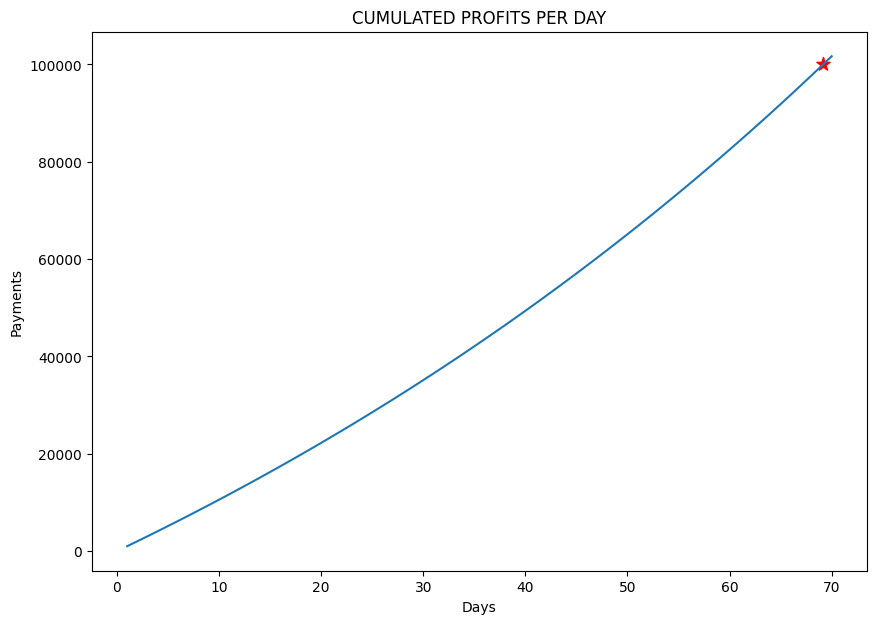

In [77]:
# Plotting cumulated profits per day, show initial investment and mark breakeven day. === matplotlib
plt.figure(figsize=(10, 7))
plt.plot(days_list, acc_pymts_list)

plt.title("CUMULATED PROFITS PER DAY")
plt.xlabel("Days")
plt.ylabel("Payments") 

profit_day = np.interp(init_invest, acc_pymts_list , days_list)

plt.scatter(profit_day, init_invest, color = 'red', s=100, marker = '*')  # Plotting the last days vs the initial investment

plt.show()

### Question 6

In [78]:
ebolaExcelData = pd.read_excel('ebola_download.xls')                      # Reading the data from excel file
ebolaExcelData.info()                                                     # Getting info about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      80 non-null     datetime64[ns]
 1   Cases     80 non-null     int64         
 2   Death     80 non-null     int64         
 3   Diff      80 non-null     int64         
 4   Noofdays  80 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 3.2 KB


In [79]:
ebolaExcelData = ebolaExcelData[['Date','Cases','Death']]                  # Extracting Dates, Cases, and Deaths
ebolaExcelData.isnull().sum()                                              # Checking for null values

Date     0
Cases    0
Death    0
dtype: int64

In [80]:
ebolaExcelData                                                             # View the data

,Date,Cases,Death
0,2014-03-22,49,29
1,2014-03-24,86,59
2,2014-03-25,86,60
3,2014-03-26,86,62
4,2014-03-27,111,72
...,...,...,...
75,2014-11-02,13014,5191
76,2014-11-04,13200,5275
77,2014-11-09,14068,5496
78,2014-11-11,14383,5492


In [81]:
ebolaDataSize = ebolaExcelData.shape[0]                                    # Finding the dimension of the first column (Date)
ebolaDataSize                                                              # View the size of the first column

80

In [82]:
ebolaData = ebolaExcelData.sort_values(by='Date')                          # Sorting the data by date
firstDate = ebolaData.Date[0]                                              # The first date in the sorted data
lastDate = ebolaData.Date[ebolaDataSize-1]                                 # The last date in the sorted data

range_of_dates = pd.date_range(start = firstDate, end = lastDate)          # Filling in the skipped dates

In [83]:
len(range_of_dates)                                                        # View the length or amount of the new dates

236

In [168]:
ebolaData=ebolaData.set_index('Date')                                      # Set the 'Date' column to be index
ebolaData=ebolaData.reindex(range_of_dates)                                # Conform to new index. Places NA/NaN in locations having no value in the previous index
ebolaData=ebolaData.rename_axis('Date').reset_index()                      # Adding the title to the index (date) column 
ebolaData

,Date,Cases,Death
0,2014-03-22,49.0,29.0
1,2014-03-23,NaN,NaN
2,2014-03-24,86.0,59.0
3,2014-03-25,86.0,60.0
4,2014-03-26,86.0,62.0
...,...,...,...
231,2014-11-08,NaN,NaN
232,2014-11-09,14068.0,5496.0
233,2014-11-10,NaN,NaN
234,2014-11-11,14383.0,5492.0


In [169]:
ebolaData.isnull().sum()

Date       0
Cases    156
Death    156
dtype: int64

In [170]:
ebolaInterpolatedData=ebolaData.interpolate('ffill', limit_direction='forward')      # Interpolation
ebolaInterpolatedData

,Date,Cases,Death
0,2014-03-22,49.0,29.0
1,2014-03-23,49.0,29.0
2,2014-03-24,86.0,59.0
3,2014-03-25,86.0,60.0
4,2014-03-26,86.0,62.0
...,...,...,...
231,2014-11-08,13200.0,5275.0
232,2014-11-09,14068.0,5496.0
233,2014-11-10,14068.0,5496.0
234,2014-11-11,14383.0,5492.0


In [171]:
ebolaInterpolatedData.isnull().sum()

Date     0
Cases    0
Death    0
dtype: int64

#### Ebola cases values

In [172]:
casesList = [100, 500, 1000, 2000, 5000]
i = 0
excCases = []

while i < len(casesList):
    for c in ebolaInterpolatedData['Cases']:
        if c >= casesList[i]: 
            break
    excCases.append(c)
    i = i + 1
    
excCases

[111.0, 522.0, 1048.0, 2127.0, 5339.0]

#### Ebola cases dates values

In [173]:
c = 0
excCasesDates = []

while c < len(excCases):
    caseDate=ebolaInterpolatedData[ebolaInterpolatedData['Cases'] == excCases[c]]
    caseDate=caseDate.iloc[0]
    caseDate=caseDate['Date']
    excCasesDates.append(caseDate)
    c = c + 1
    
excCasesDates                                                # 5 dates of ebola cases

[Timestamp('2014-03-27 00:00:00'),
 Timestamp('2014-06-15 00:00:00'),
 Timestamp('2014-07-17 00:00:00'),
 Timestamp('2014-08-13 00:00:00'),
 Timestamp('2014-09-14 00:00:00')]

#### Ebola deaths values

In [174]:
deathsList = [100, 500, 1000, 2000, 5000]
i = 0
excDeaths = []

while i < len(deathsList):
    for c in ebolaInterpolatedData['Death']:
        if c >= deathsList[i]: 
            break
    excDeaths.append(c)
    i = i + 1
    
excDeaths

[105.0, 518.0, 1013.0, 2089.0, 5026.0]

#### Ebola cases dates values

In [175]:
d = 0
excDeathsDates = []

while d < len(excDeaths):
    deathDate=ebolaInterpolatedData[ebolaInterpolatedData['Death'] == excDeaths[d]]
    deathDate=deathDate.iloc[0]
    deathDate=deathDate['Date']
    excDeathsDates.append(deathDate)
    d = d + 1
    
excDeathsDates                                                # 5 dates of ebola deaths

[Timestamp('2014-04-07 00:00:00'),
 Timestamp('2014-07-06 00:00:00'),
 Timestamp('2014-08-09 00:00:00'),
 Timestamp('2014-09-03 00:00:00'),
 Timestamp('2014-10-24 00:00:00')]

#### Plotting cases vs dates

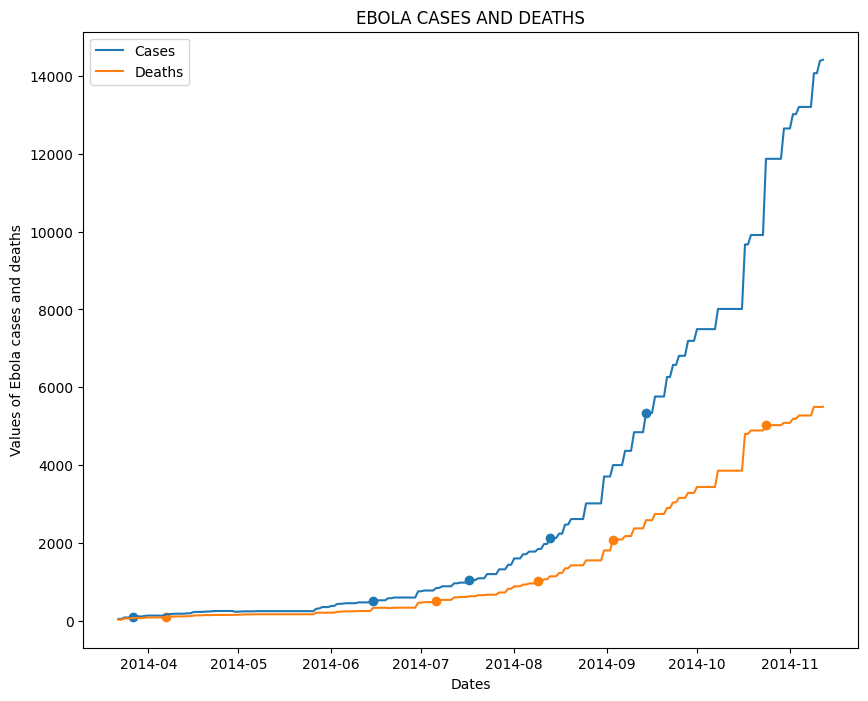

In [176]:
ebolaCasesData=ebolaInterpolatedData["Cases"]
ebolaDeathsData=ebolaInterpolatedData["Death"]

plt.figure(figsize=(10,8))

plt.plot(ebolaInterpolatedData.Date, ebolaCasesData, label='Cases')
plt.scatter(excCasesDates, excCases)

plt.plot(ebolaInterpolatedData.Date, ebolaDeathsData, label='Deaths')
plt.scatter(excDeathsDates, excDeaths)

plt.title("EBOLA CASES AND DEATHS")
plt.ylabel("Values of Ebola cases and deaths")
plt.xlabel("Dates")
plt.legend()
plt.show()

### Question 6